In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [165]:
path = 'TechnicalTakeHomeAssignment_Data.xlsx'
df_load = pd.read_excel(path, sheet_name = 'Data')

In [166]:
df_load.head(3)

,Warehouse,Job Function,ID,Haptic Group,Baseline File Count,Baseline Average Lift Rate,Baseline Average Max Forward Bend,Baseline Average Max Tilt Velocity,Baseline Average Twist Velocity,Baseline Average Safety Score,Intervention File Count,Intervention Average Lift Rate,Intervention Average Max Forward Bend,Intervention Average Max Tilt Velocity,Intervention Average Twist Velocity,Intervention Average Safety Score
0,Albany,Package Handler,A8R965235592,3 bends in 8 minute window over 65 degrees,19.0,155.7,93.1,88.8,23.2,59.7,13.0,131.7,75.7,76.7,23.4,67.7
1,Albany,Package Handler,A8R948483372,2 bends in 5 minute window over 65 degrees,7.0,153.8,97.6,76.1,24.5,62.7,2.0,142.3,90.4,88.3,24.9,60.2
2,Albany,Package Handler,A8R976577272,2 bends in 10 minute window over 65 degrees,16.0,145.6,86.9,76.7,21.0,66.4,17.0,124.1,69.7,76.3,20.8,70.2


In [167]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Warehouse                               267 non-null    object 
 1   Job Function                            267 non-null    object 
 2   ID                                      267 non-null    object 
 3   Haptic Group                            267 non-null    object 
 4   Baseline File Count                     250 non-null    float64
 5   Baseline Average Lift Rate              250 non-null    float64
 6   Baseline Average Max Forward Bend       250 non-null    float64
 7   Baseline Average Max Tilt Velocity      250 non-null    float64
 8   Baseline Average Twist Velocity         250 non-null    float64
 9   Baseline Average Safety Score           250 non-null    float64
 10  Intervention File Count                 226 non-null    float6

### Since the missing values are not too much, we will drop all the missing values.

In [168]:
df_load.dropna(inplace=True)
df_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 249
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Warehouse                               209 non-null    object 
 1   Job Function                            209 non-null    object 
 2   ID                                      209 non-null    object 
 3   Haptic Group                            209 non-null    object 
 4   Baseline File Count                     209 non-null    float64
 5   Baseline Average Lift Rate              209 non-null    float64
 6   Baseline Average Max Forward Bend       209 non-null    float64
 7   Baseline Average Max Tilt Velocity      209 non-null    float64
 8   Baseline Average Twist Velocity         209 non-null    float64
 9   Baseline Average Safety Score           209 non-null    float64
 10  Intervention File Count                 209 non-null    float6

In [169]:
df_load.duplicated('ID').sum()

0

### No duplicated IDs.

In [170]:
df_load.value_counts(subset=['Warehouse','Job Function','Haptic Group'])

Warehouse  Job Function     Haptic Group                               
Albany     Package Handler  2 bends in 5 minute window over 65 degrees     76
                            3 bends in 8 minute window over 65 degrees     69
                            2 bends in 10 minute window over 65 degrees    64
dtype: int64

### We will not take into consider of warehouse and job function since both of them have only 1 unique value. For instance, we will focus on 3 differenct haptic groups.

### Boxplot for detecting outliers, seperated by baseline and intervention.

<AxesSubplot:>

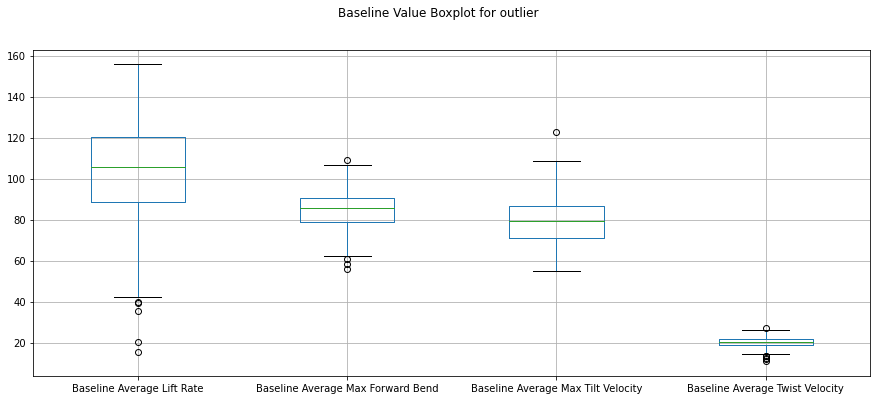

In [171]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Baseline Value Boxplot for outlier')
column_baseline=['Baseline Average Lift Rate','Baseline Average Max Forward Bend','Baseline Average Max Tilt Velocity','Baseline Average Twist Velocity']
df_load.boxplot(column=column_baseline)

<AxesSubplot:>

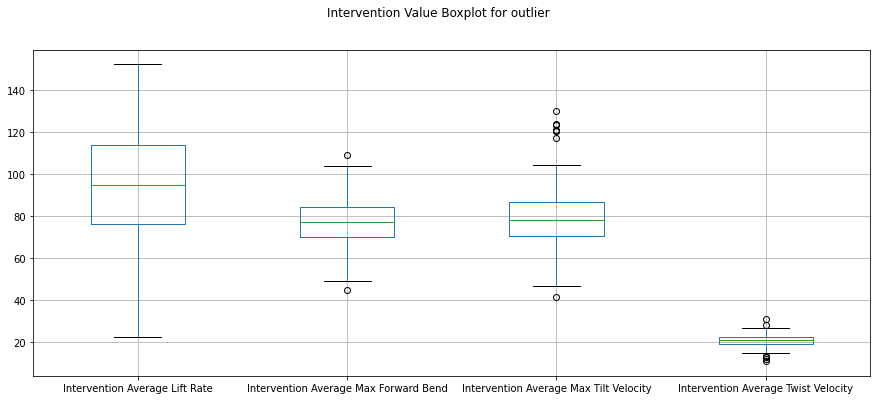

In [172]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Intervention Value Boxplot for outlier')
column_intervention=['Intervention Average Lift Rate','Intervention Average Max Forward Bend','Intervention Average Max Tilt Velocity','Intervention Average Twist Velocity']
df_load.boxplot(column=column_intervention)

### There are few outliers but still possible values considering the real world meaning of those data, so we will keep them.

### Since we will compare the values between baseline and intervention to test the effectiveness of the equipment, we will devide the dataset into 2 tables. 

In [173]:
#split for baseline
df_b = df_load[['Haptic Group', 'Baseline File Count', 'Baseline Average Lift Rate','Baseline Average Max Forward Bend','Baseline Average Max Tilt Velocity','Baseline Average Twist Velocity', 'Baseline Average Safety Score']]
df_b

,Haptic Group,Baseline File Count,Baseline Average Lift Rate,Baseline Average Max Forward Bend,Baseline Average Max Tilt Velocity,Baseline Average Twist Velocity,Baseline Average Safety Score
0,3 bends in 8 minute window over 65 degrees,19.0,155.7,93.1,88.8,23.2,59.7
1,2 bends in 5 minute window over 65 degrees,7.0,153.8,97.6,76.1,24.5,62.7
2,2 bends in 10 minute window over 65 degrees,16.0,145.6,86.9,76.7,21.0,66.4
4,2 bends in 5 minute window over 65 degrees,9.0,145.1,105.0,86.1,23.2,58.6
6,2 bends in 5 minute window over 65 degrees,5.0,142.4,89.6,89.9,23.6,60.6
...,...,...,...,...,...,...,...
242,3 bends in 8 minute window over 65 degrees,24.0,39.8,89.5,70.6,14.7,73.8
243,2 bends in 5 minute window over 65 degrees,15.0,39.2,72.5,80.4,13.7,73.7
244,2 bends in 10 minute window over 65 degrees,17.0,35.6,78.3,73.7,12.1,75.4
247,2 bends in 5 minute window over 65 degrees,18.0,20.4,60.8,62.8,12.4,80.5


In [174]:
#split for intervention
df_i = df_load[['Haptic Group', 'Intervention File Count', 'Intervention Average Lift Rate','Intervention Average Max Forward Bend','Intervention Average Max Tilt Velocity','Intervention Average Twist Velocity', 'Intervention Average Safety Score']]
df_i

,Haptic Group,Intervention File Count,Intervention Average Lift Rate,Intervention Average Max Forward Bend,Intervention Average Max Tilt Velocity,Intervention Average Twist Velocity,Intervention Average Safety Score
0,3 bends in 8 minute window over 65 degrees,13.0,131.7,75.7,76.7,23.4,67.7
1,2 bends in 5 minute window over 65 degrees,2.0,142.3,90.4,88.3,24.9,60.2
2,2 bends in 10 minute window over 65 degrees,17.0,124.1,69.7,76.3,20.8,70.2
4,2 bends in 5 minute window over 65 degrees,16.0,131.4,104.0,89.9,23.7,58.1
6,2 bends in 5 minute window over 65 degrees,8.0,142.4,84.4,84.3,22.3,64.1
...,...,...,...,...,...,...,...
242,3 bends in 8 minute window over 65 degrees,19.0,48.1,83.8,76.1,16.2,72.3
243,2 bends in 5 minute window over 65 degrees,20.0,52.0,76.6,78.3,15.2,72.6
244,2 bends in 10 minute window over 65 degrees,17.0,46.2,68.7,64.3,12.8,78.9
247,2 bends in 5 minute window over 65 degrees,18.0,23.7,63.6,68.5,12.2,78.8


In [175]:
def weighted_average_m1(distribution, weights):
    return round(sum([distribution[i]*weights[i] for i in range(len(distribution))])/sum(weights),2)

In [176]:
# weighted average for baseline numbers
comparables = ('Average Lift Rate', 'Average Max Forward Bend', 'Average Max Tilt Velocity', 'Average Twist Velocity', 'Average Safety Score')

for i in comparables:
    print('Baseline ' + i + ':', weighted_average_m1(np.array(df_b['Baseline ' + i]), np.array(df_b['Baseline File Count'])))

Baseline Average Lift Rate: 103.05
Baseline Average Max Forward Bend: 85.17
Baseline Average Max Tilt Velocity: 79.31
Baseline Average Twist Velocity: 20.2
Baseline Average Safety Score: 67.29


In [177]:
# weighted average for intervention numbers
for i in comparables:
    print('Intervention ' + i + ':', weighted_average_m1(np.array(df_i['Intervention ' + i]), np.array(df_i['Intervention File Count'])))

Intervention Average Lift Rate: 94.65
Intervention Average Max Forward Bend: 77.5
Intervention Average Max Tilt Velocity: 79.49
Intervention Average Twist Velocity: 20.38
Intervention Average Safety Score: 68.61


### Calculate the T-test for the means of two independent samples.

In [178]:
comparables = ('Average Lift Rate', 'Average Max Forward Bend', 'Average Max Tilt Velocity', 'Average Twist Velocity', 'Average Safety Score')

for i in comparables:
    print(i+':', stats.ttest_ind(df_b['Baseline ' + i], df_i['Intervention ' + i], equal_var=False))

Average Lift Rate: Ttest_indResult(statistic=3.413393861224649, pvalue=0.0007046780575591738)
Average Max Forward Bend: Ttest_indResult(statistic=7.522621170172727, pvalue=3.616060233552768e-13)
Average Max Tilt Velocity: Ttest_indResult(statistic=0.22499021714140902, pvalue=0.8221039191114687)
Average Twist Velocity: Ttest_indResult(statistic=-1.1068836189210227, pvalue=0.2689889669540211)
Average Safety Score: Ttest_indResult(statistic=-2.4795464377452077, pvalue=0.013560616272913122)


### Results: 
* in general, without considering the different haptic groups, we can reject the hypothesis that there is no significant difference/improvement between the baseline average figures and the intervention average figures EXCEPT the average max tilt velocity and average twist velocity, which mean there are significant difference/improvement using the equipment for average lift rate, average max forward bend, and average safety score.

### Split  by haptic groups

In [179]:
# split the dataset by haptic groups
df_b_3b8m = df_b[df_b['Haptic Group'] == '3 bends in 8 minute window over 65 degrees']
df_b_2b5m = df_b[df_b['Haptic Group'] == '2 bends in 5 minute window over 65 degrees']
df_b_2b10m = df_b[df_b['Haptic Group'] == '2 bends in 10 minute window over 65 degrees']
df_i_3b8m = df_i[df_i['Haptic Group'] == '3 bends in 8 minute window over 65 degrees']
df_i_2b5m = df_i[df_i['Haptic Group'] == '2 bends in 5 minute window over 65 degrees']
df_i_2b10m = df_i[df_i['Haptic Group'] == '2 bends in 10 minute window over 65 degrees']

array([[<AxesSubplot:title={'center':'Baseline Average Safety Score'}>]],
      dtype=object)

<Figure size 1080x432 with 0 Axes>

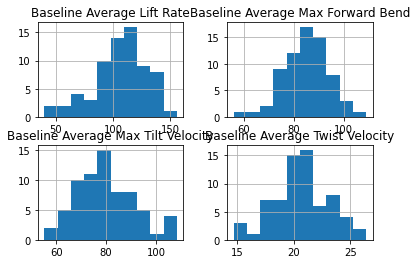

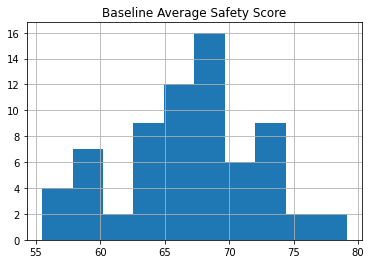

In [180]:
#distribution check for normal distribution
columns = ['Baseline Average Lift Rate', 'Baseline Average Max Forward Bend', 'Baseline Average Max Tilt Velocity', 'Baseline Average Twist Velocity']
fig = plt.figure(figsize=(15,6))
df_b_3b8m.hist(column=columns)
df_b_3b8m.hist(column='Baseline Average Safety Score')

In [181]:
# t-test for 3 bends in 8 minute
for i in comparables:
    print('3 bends in 8 minute ' + i +':', stats.ttest_ind(df_b_3b8m['Baseline ' + i], df_i_3b8m['Intervention ' + i], equal_var=False))

3 bends in 8 minute Average Lift Rate: Ttest_indResult(statistic=2.3026718176636956, pvalue=0.022817632515134974)
3 bends in 8 minute Average Max Forward Bend: Ttest_indResult(statistic=3.333283881604222, pvalue=0.0011182311491423735)
3 bends in 8 minute Average Max Tilt Velocity: Ttest_indResult(statistic=-0.577112655064434, pvalue=0.5648551889614366)
3 bends in 8 minute Average Twist Velocity: Ttest_indResult(statistic=-0.7900914293365363, pvalue=0.4308498540424649)
3 bends in 8 minute Average Safety Score: Ttest_indResult(statistic=-0.7206139257715112, pvalue=0.4724041582779932)


In [182]:
# t-test for 2 bends in 5 minute
for i in comparables:
    print('2 bends in 5 minute ' + i +':', stats.ttest_ind(df_b_2b5m['Baseline ' + i], df_i_2b5m['Intervention ' + i], equal_var=False))

2 bends in 5 minute Average Lift Rate: Ttest_indResult(statistic=2.2781765195079275, pvalue=0.024129138239124107)
2 bends in 5 minute Average Max Forward Bend: Ttest_indResult(statistic=4.785696625785754, pvalue=4.079206764958485e-06)
2 bends in 5 minute Average Max Tilt Velocity: Ttest_indResult(statistic=0.6990147093898585, pvalue=0.48569590303097454)
2 bends in 5 minute Average Twist Velocity: Ttest_indResult(statistic=0.2362008499986128, pvalue=0.8136003682012831)
2 bends in 5 minute Average Safety Score: Ttest_indResult(statistic=-2.1760484239124165, pvalue=0.0311575698118349)


In [183]:
# t-test for 2 bends in 10 minute
for i in comparables:
    print('2 bends in 10 minute ' + i +':', stats.ttest_ind(df_b_2b10m['Baseline ' + i], df_i_2b10m['Intervention ' + i], equal_var=False))

2 bends in 10 minute Average Lift Rate: Ttest_indResult(statistic=1.3016086323129188, pvalue=0.1954491693793261)
2 bends in 10 minute Average Max Forward Bend: Ttest_indResult(statistic=5.145190961330269, pvalue=1.1983295140989514e-06)
2 bends in 10 minute Average Max Tilt Velocity: Ttest_indResult(statistic=0.20289029319427182, pvalue=0.8395771350787209)
2 bends in 10 minute Average Twist Velocity: Ttest_indResult(statistic=-1.4314083558973258, pvalue=0.15488417451574138)
2 bends in 10 minute Average Safety Score: Ttest_indResult(statistic=-1.342895526383417, pvalue=0.18185007319124324)


In [184]:
#weighted average for baseline 3 bends in 8 minute
df_b_3b8m_weighted_avg =[]
for i in comparables:
    df_b_3b8m_weighted_avg.append(weighted_average_m1(np.array(df_b_3b8m['Baseline ' + i]), np.array(df_b_3b8m['Baseline File Count'])))
df_b_3b8m_weighted_avg

[105.67, 84.95, 78.36, 20.65, 67.31]

In [185]:
#weighted average for intervention 3 bends in 8 minute
df_i_3b8m_weighted_avg =[]
for i in comparables:
    df_i_3b8m_weighted_avg.append(weighted_average_m1(np.array(df_i_3b8m['Intervention ' + i]), np.array(df_i_3b8m['Intervention File Count'])))
df_i_3b8m_weighted_avg

[98.06, 78.25, 79.72, 20.96, 68.04]

In [186]:
#weighted average for baseline 2 bends in 5 minute
df_b_2b5m_weighted_avg =[]
for i in comparables:
    df_b_2b5m_weighted_avg.append(weighted_average_m1(np.array(df_b_2b5m['Baseline ' + i]), np.array(df_b_2b5m['Baseline File Count'])))
df_b_2b5m_weighted_avg

[101.35, 85.96, 81.03, 20.1, 66.69]

In [187]:
#weighted average for intervention 2 bends in 5 minute
df_i_2b5m_weighted_avg =[]
for i in comparables:
    df_i_2b5m_weighted_avg.append(weighted_average_m1(np.array(df_i_2b5m['Intervention ' + i]), np.array(df_i_2b5m['Intervention File Count'])))
df_i_2b5m_weighted_avg

[93.22, 78.17, 80.76, 20.24, 68.24]

In [188]:
#weighted average for baseline 2 bends in 10 minute
df_b_2b10m_weighted_avg =[]
for i in comparables:
    df_b_2b10m_weighted_avg.append(weighted_average_m1(np.array(df_b_2b10m['Baseline ' + i]), np.array(df_b_2b10m['Baseline File Count'])))
df_b_2b10m_weighted_avg

[102.2, 84.33, 78.06, 19.78, 68.1]

In [189]:
#weighted average for intervention 2 bends in 10 minute
df_i_2b10m_weighted_avg =[]
for i in comparables:
    df_i_2b10m_weighted_avg.append(weighted_average_m1(np.array(df_i_2b10m['Intervention ' + i]), np.array(df_i_2b10m['Intervention File Count'])))
df_i_2b10m_weighted_avg

[92.49, 75.6, 77.35, 19.87, 69.85]

In [190]:
#difference/improve by haptic groups
_3b8m_improve = (np.array(df_b_3b8m_weighted_avg) - np.array(df_i_3b8m_weighted_avg)) / np.array(df_b_3b8m_weighted_avg)
_2b5m_improve = (np.array(df_b_2b5m_weighted_avg) - np.array(df_i_2b5m_weighted_avg)) / np.array(df_b_2b5m_weighted_avg)
_2b10m_improve = (np.array(df_b_2b10m_weighted_avg) - np.array(df_i_2b10m_weighted_avg)) / np.array(df_b_2b10m_weighted_avg)

In [191]:
# result for 3b8m
result_3b8m = pd.DataFrame({
    'Group': comparables,
    'Baseline_3b8m': df_b_3b8m_weighted_avg, 'Intervention_3b8m': df_i_3b8m_weighted_avg, 'Improve_3b8m': _3b8m_improve,
    'Significant': ['Yes','Yes','No','No','No']})
result_3b8m

,Group,Baseline_3b8m,Intervention_3b8m,Improve_3b8m,Significant
0,Average Lift Rate,105.67,98.06,0.072017,Yes
1,Average Max Forward Bend,84.95,78.25,0.078870,Yes
2,Average Max Tilt Velocity,78.36,79.72,-0.017356,No
3,Average Twist Velocity,20.65,20.96,-0.015012,No
4,Average Safety Score,67.31,68.04,-0.010845,No


In [192]:
# result for 2b5m
result_2b5m = pd.DataFrame({
    'Group': comparables,
    'Baseline_2b5m': df_b_2b5m_weighted_avg, 'Intervention_2b5m': df_i_2b5m_weighted_avg, 'Improve_2b5m': _2b5m_improve,
    'Significant': ['Yes','Yes','No','No','Yes']})
result_2b5m

,Group,Baseline_2b5m,Intervention_2b5m,Improve_2b5m,Significant
0,Average Lift Rate,101.35,93.22,0.080217,Yes
1,Average Max Forward Bend,85.96,78.17,0.090624,Yes
2,Average Max Tilt Velocity,81.03,80.76,0.003332,No
3,Average Twist Velocity,20.10,20.24,-0.006965,No
4,Average Safety Score,66.69,68.24,-0.023242,Yes


In [193]:
# result for 2b10m
result_2b10m = pd.DataFrame({
    'Group': comparables,
    'Baseline_2b10m': df_b_2b10m_weighted_avg, 'Intervention_2b10m': df_i_2b10m_weighted_avg, 'Improve_2b10m': _2b10m_improve,
    'Significant': ['No','Yes','No','No','No']})
result_2b10m

,Group,Baseline_2b10m,Intervention_2b10m,Improve_2b10m,Significant
0,Average Lift Rate,102.20,92.49,0.095010,No
1,Average Max Forward Bend,84.33,75.60,0.103522,Yes
2,Average Max Tilt Velocity,78.06,77.35,0.009096,No
3,Average Twist Velocity,19.78,19.87,-0.004550,No
4,Average Safety Score,68.10,69.85,-0.025698,No


## Summary insights and recommendations
* Assumption 1: Average safety score is considered to be the most valuable metric for evaluating the overall performance
* Assumption 2: The provided dataset is sufficient and could be considered as normal distributed.
* Insight 1: In general, comparing to normal operation, the average safety scores improved and we could confidently conclude that the improvement is due to the equipment's protection - wearing the sensor and turning on the vibrational alerts.
* Insight 2: Users could reduce the average number of bends per hour and the average max forward bend in degrees due to the vibrational alerts thus lowering the risk of being injured.
* Insight 3: No evidence shows that there are significant changes or improvements for the speeds of tilt and twist.
* Insight 4: When the vibrational alert is set to 2 bends in 5 minute window over 65 degrees, the equipment performed the best. The result shows significant improvement for lowering the average number of bends per hour, the average max forward bend in degrees, and most importantly, increasing the average safety score by 2.32%.
* Recommendations: Among the 3 haptic options, user could benefit more when the vibrational alert is set to 2 bends in 5 minute window over 65 degrees.

### Future consideration
* Different locations(warehouses) and job functions plus associated information should be taken into consideration.
* Different variance/std by different file counts should be taken into consideration for best t-test result.
* Based on the results of 3 haptic options, it might be the case that the more frequently the alert is triggered, the better result in protection may achieved. So more haptic options could be tested for best result.